In [10]:
# Insert top level directory into the system path so parent and sibling 
# modules can be imported 
import pathlib
import sys
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import preprocessing as p
# Convert path to use proper directory markers based on 
# operating system
PATH = str(pathlib.Path('../../'))

# Insert path to system path
sys.path.insert(0, PATH)

SVC accuracy:0.6270833333333333
SVC confusion matrix
     0    1
0  159  259
1   99  443


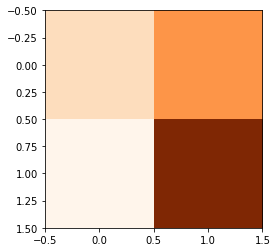

SVC Metrics
   F1 Score
0  0.470414
1  0.712219
   Precision    Recall
0   0.616279  0.380383
1   0.631054  0.817343


SVC(C=10, gamma=0.001)

In [2]:
from FootballML.Classifiers.Individual.svm.svm_classifier import svm_tuned
from FootballML.Classifiers.Individual.svm.svm_classifier import return_training_data
from FootballML.Classifiers.Individual.svm.svm_classifier_param_tuner import param_tuner

svm_tuned(display_output=True)

# Initial Result Analysis
First let's establish 0 and 1 as 0 for loss, 1 for win.
Based on the results, we can see the model has a strong tendency to over predict false positives compared to false negatives. This is the main source of innacuracy. The model exhibits reasonable precision for both losses and wins, but displays a huge disparity in recall and F1 scores between losses and wins.

Based on the dataset, I think it can be reasonably concluded that this is because of close games. Close games happen the majority of the time, and while it may be able to read in some key information to tip the scales in some games, a lot of games are not won by purely numbers alone. I think that the machine tends to over predict winning because of the nature of the data- a lot of teams statistically can perform well and still lose. 

I think it can also be reasonably interepreted that the machine is not just blindly guessing, because it still exhibits a strong number of true negatives.

# Selecting HyperParameters
I used GridSearchCV with a cross-fold validation of 5 to index various values of C, gamma, and kernel types. I also experimented with different scalers and wrote all my output to a .txt file. I implemented a function to read in the best  scores and output exactly what model obtained it. After roughly 2000 data entries, these are the parameters I achieved.

In [3]:
param_tuner()

Average accuracy: 0.6181950270893563
Highest accuracy: 0.7033738191632929
Achieved with: USING THE: <class 'sklearn.preprocessing._data.RobustScaler'>AND {'C': 0.1, 'gamma': 0.1, 'kernel': 'sigmoid'}

Total trials indexed: 2322.0


# HyperParameter Analysis

In [4]:
# return our fit svc object
svc_obj = svm_tuned()
# get some data to play with
X, Y = return_training_data()
scaler = p.QuantileTransformer(n_quantiles=len(X))
X_scaled = scaler.fit_transform(X, Y)
datapoints = []
scalers = ["Quantile", "Robust", "Standard", "MinMax", "NormalPDF"]
datapoints.append(svc_obj.score(X_scaled, Y))
print(datapoints[0])

0.6625


We can see that the model achieves a fairly reasonable accuracy predicting the entire 2018-2019 season, given that the data is scaled using the preferred scaler. If we were to use a worse scaler:

In [5]:
scaler = p.RobustScaler()
X_scaled = scaler.fit_transform(X, Y)
datapoints.append(svc_obj.score(X_scaled, Y))
print(datapoints[1])

0.6208333333333333


We can see that the model performs still fairly well but not as well. Now let's try varying the scaler all over the place.

In [6]:
scaler = p.StandardScaler()
X_scaled = scaler.fit_transform(X, Y)
datapoints.append(svc_obj.score(X_scaled, Y))
scaler = p.MinMaxScaler()
X_scaled = scaler.fit_transform(X, Y)
datapoints.append(svc_obj.score(X_scaled, Y))
scaler = p.QuantileTransformer(output_distribution='normal', n_quantiles=len(X)) # similar to the regular Quantile but follows the normal PDF 
X_scaled = scaler.fit_transform(X, Y)
datapoints.append(svc_obj.score(X_scaled, Y))

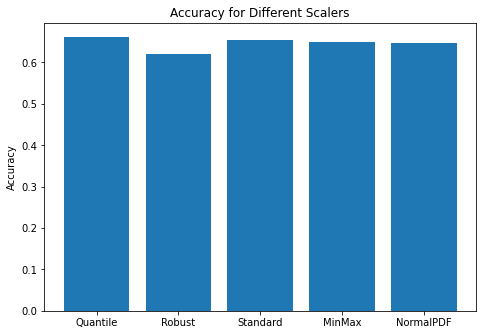

In [7]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(scalers,datapoints)
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy for Different Scalers')
plt.show()

We can see that the data scaler did not have significant impact on the data, but that the QuantileTransformer performs the best. However, when we vary the C value, things start to get weird.

In [8]:
param_tuner(mode='write', j=1)

              precision    recall  f1-score   support

           0       0.57      0.40      0.47        20
           1       0.65      0.79      0.71        28

    accuracy                           0.62        48
   macro avg       0.61      0.59      0.59        48
weighted avg       0.62      0.62      0.61        48

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s


{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=10, gamma=0.1)
              precision    recall  f1-score   support

           0       0.58      0.55      0.56        20
           1       0.69      0.71      0.70        28

    accuracy                           0.65        48
   macro avg       0.63      0.63      0.63        48
weighted avg       0.64      0.65      0.64        48

              precision    recall  f1-score   support

           0       0.53      0.36      0.43        25
           1       0.48      0.65      0.56        23

    accuracy                           0.50        48
   macro avg       0.51      0.51      0.49        48
weighted avg       0.51      0.50      0.49        48

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done 319 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   21.8s finished
C:\Users\lenny\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (240). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s


{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=10, gamma=0.1)
              precision    recall  f1-score   support

           0       0.50      0.08      0.14        25
           1       0.48      0.91      0.63        23

    accuracy                           0.48        48
   macro avg       0.49      0.50      0.38        48
weighted avg       0.49      0.48      0.37        48

              precision    recall  f1-score   support

           0       0.67      0.24      0.35        25
           1       0.51      0.87      0.65        23

    accuracy                           0.54        48
   macro avg       0.59      0.55      0.50        48
weighted avg       0.59      0.54      0.49        48

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 477 out of 500 | elapsed:    4.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   14.9s finished
C:\Users\lenny\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2995: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s


{'C': 10, 'gamma': 1, 'kernel': 'sigmoid'}
SVC(C=10, gamma=1, kernel='sigmoid')
              precision    recall  f1-score   support

           0       0.62      0.60      0.61        25
           1       0.58      0.61      0.60        23

    accuracy                           0.60        48
   macro avg       0.60      0.60      0.60        48
weighted avg       0.61      0.60      0.60        48

              precision    recall  f1-score   support

           0       0.57      0.40      0.47        20
           1       0.65      0.79      0.71        28

    accuracy                           0.62        48
   macro avg       0.61      0.59      0.59        48
weighted avg       0.62      0.62      0.61        48

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s


{'C': 10, 'gamma': 0.001, 'kernel': 'sigmoid'}
SVC(C=10, gamma=0.001, kernel='sigmoid')
              precision    recall  f1-score   support

           0       0.53      0.40      0.46        20
           1       0.64      0.75      0.69        28

    accuracy                           0.60        48
   macro avg       0.58      0.57      0.57        48
weighted avg       0.59      0.60      0.59        48

              precision    recall  f1-score   support

           0       0.43      0.48      0.45        21
           1       0.56      0.52      0.54        27

    accuracy                           0.50        48
   macro avg       0.50      0.50      0.50        48
weighted avg       0.51      0.50      0.50        48

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done 319 tasks      | elapsed:    0.3s


{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=1, gamma=0.01)
              precision    recall  f1-score   support

           0       0.43      0.48      0.45        21
           1       0.56      0.52      0.54        27

    accuracy                           0.50        48
   macro avg       0.50      0.50      0.50        48
weighted avg       0.51      0.50      0.50        48



[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.0s finished


Scrolling through some of these results, it should be noted that the classification report is only given on the best model selected for every run. We can see that the C value, Gamma value, and kernel all vary and that the precision and recall all have very odd and poor trends for many values of C and gamma.

# More Detailed C value Analysis

In [22]:
C = [0.1, 1, 10, 100, 1000]
datapoints = []
scaler = p.QuantileTransformer(n_quantiles = len(X))
X_scaled = scaler.fit_transform(X, Y)
for c in C:
    svc_obj = svm_tuned(svm_c=c)
    datapoints.append(svc_obj.score(X_scaled, Y))

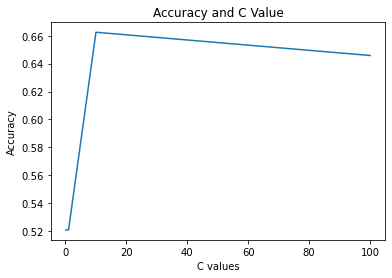

In [36]:
plt.title("Accuracy and C Value")
plt.plot(C, datapoints)
plt.ylabel("Accuracy")
plt.xlabel("C values")
plt.show()

This is about in the real of what we expect. The C value for a small C results in fairly poor accuracy. As the C value increases, we see too large of a value starts to overfit and overgeneralize the model.